# CASE STUDY: FASHION CLASS CLASSIFICATION 
# Dr. Ryan Ahmed

# STEP #1: PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

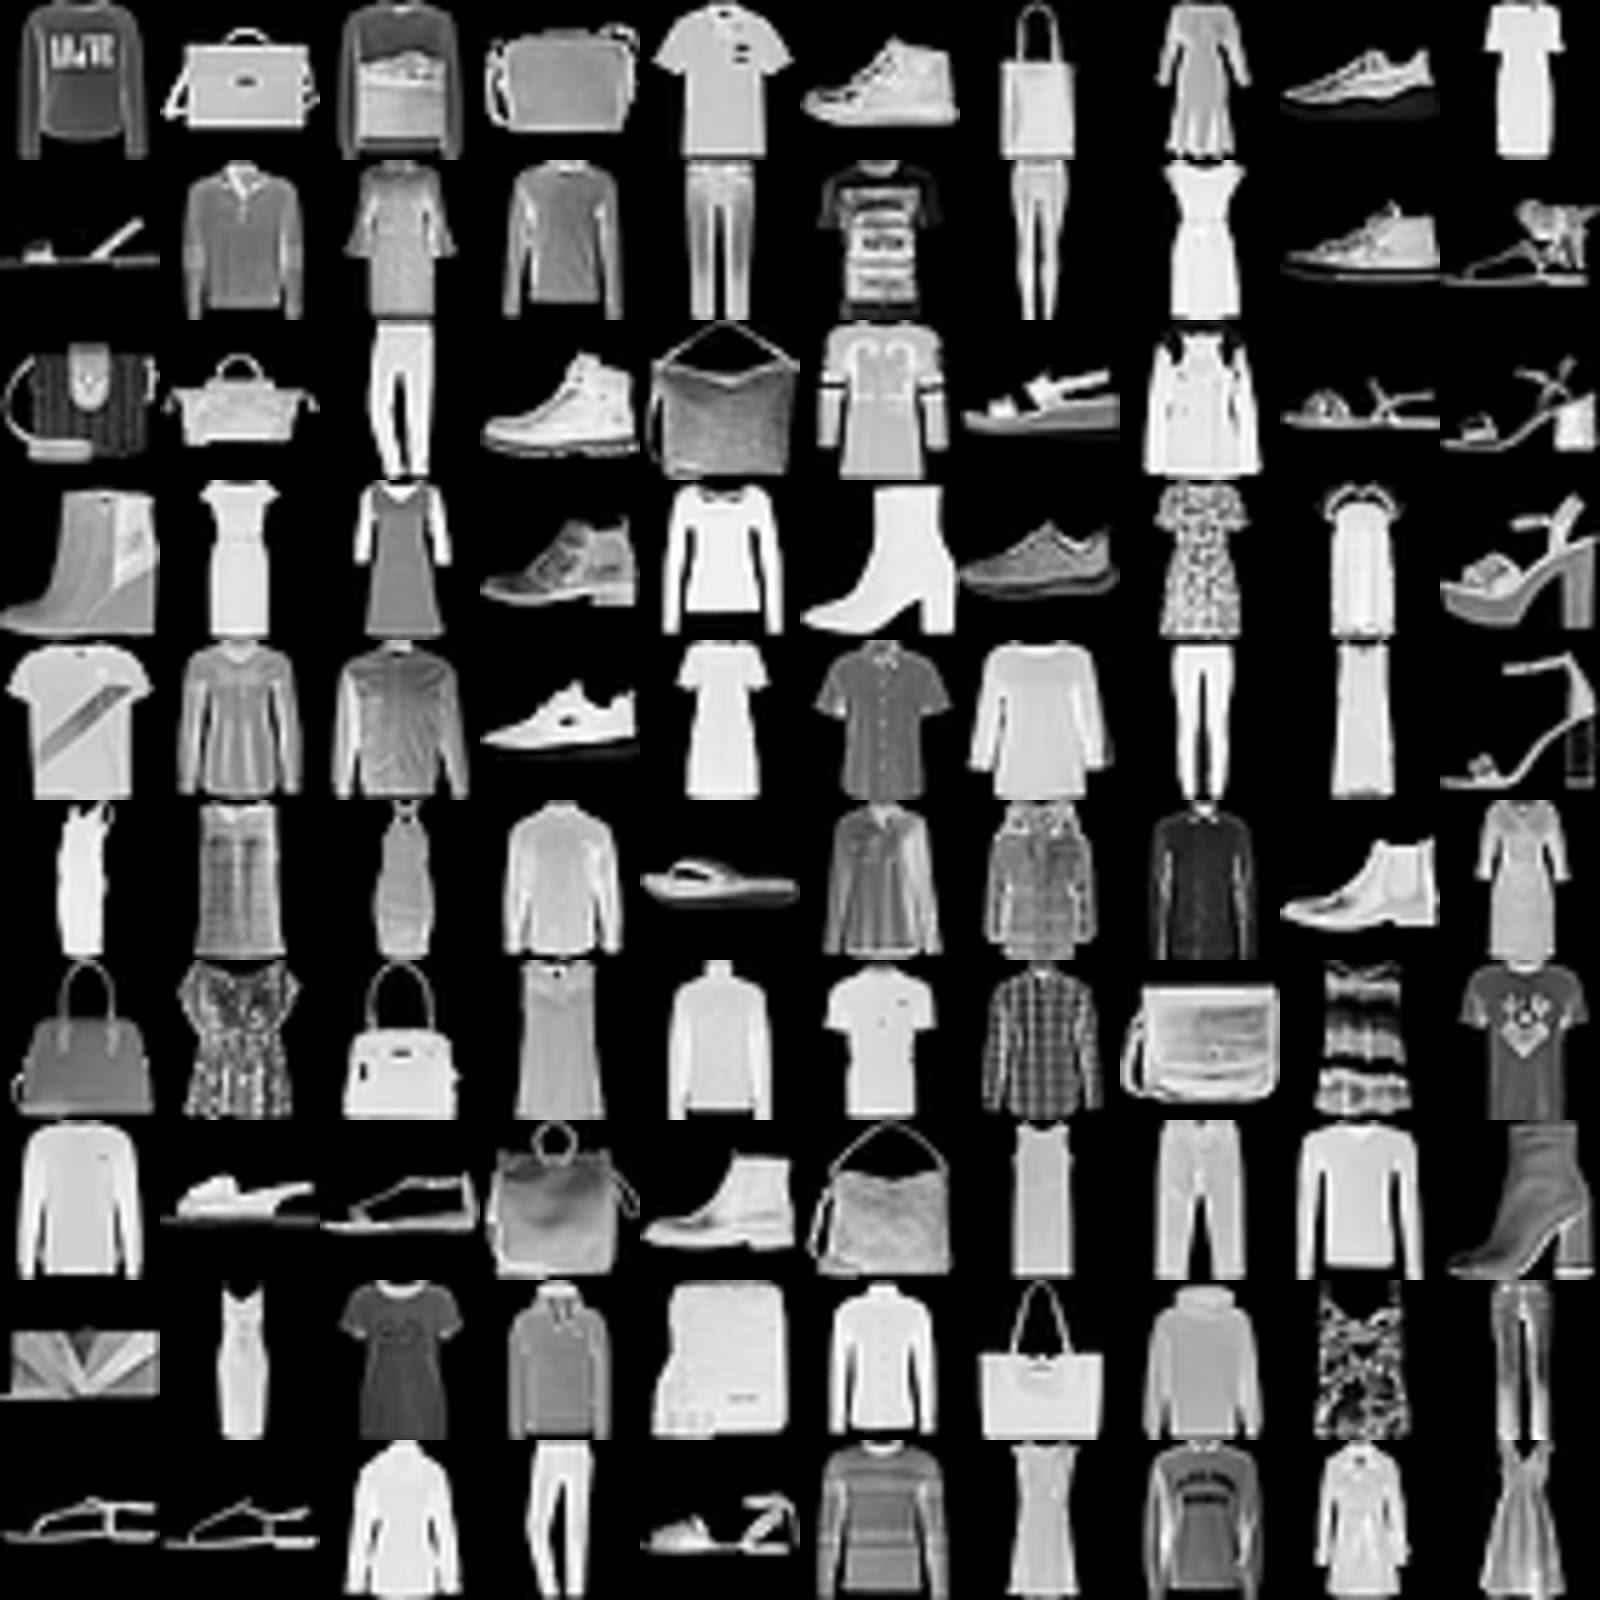


# STEP #2: IMPORTING DATA

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random


In [2]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

# STEP #3: VISUALIZATION OF THE DATASET  

In [3]:
# Let's view the head of the training dataset
# 784 indicates 28x28 pixels and 1 coloumn for the label
# After you check the tail, 60,000 training dataset are present
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Let's view the last elements in the training dataset
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Let's view the head of the testing dataset
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Let's view the last elements in the testing dataset
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [7]:
fashion_train_df.shape

(60000, 785)

In [8]:
# Create training and testing arrays
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [9]:
training.shape

(60000, 785)

In [10]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

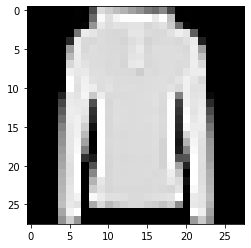

In [12]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image


# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


In [13]:
label = training[i,0]
label


2.0

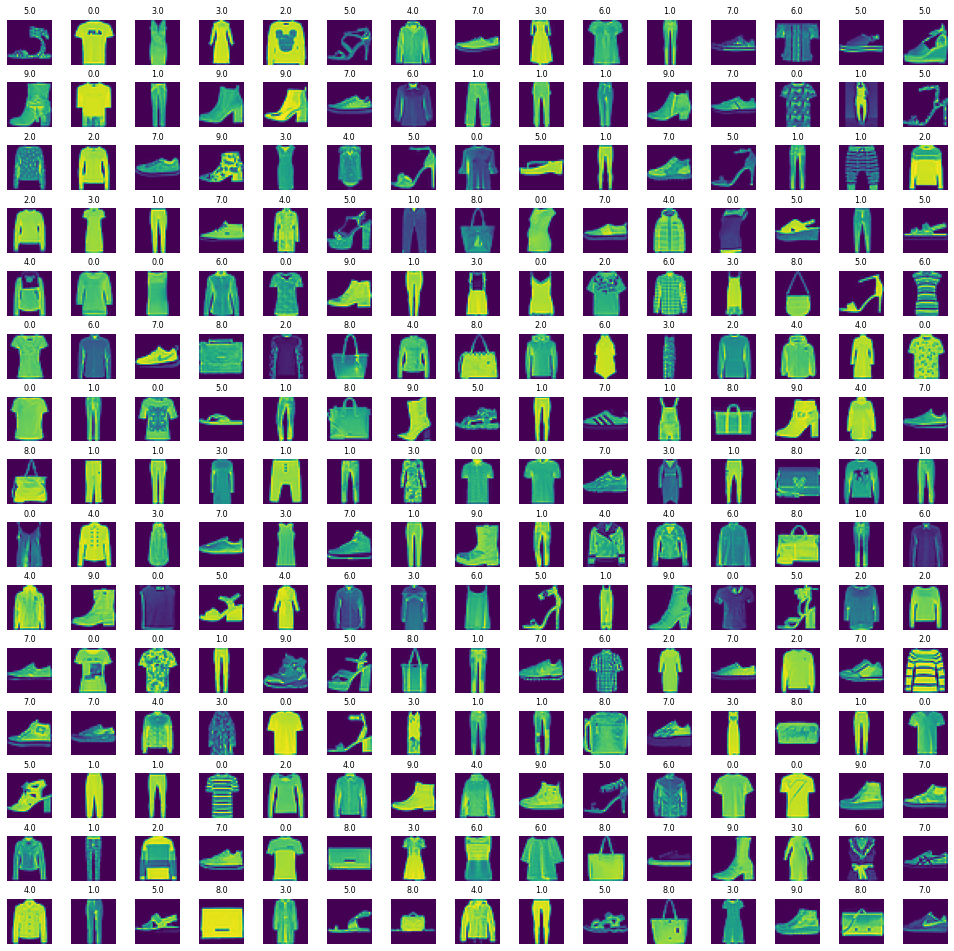

In [14]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        

# STEP #4: TRAINING THE MODEL

In [15]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [17]:
X_train.shape

(48000, 784)

In [18]:
y_train.shape

(48000,)

In [19]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [20]:
X_train.shape

(48000, 28, 28, 1)

In [21]:
X_test.shape

(10000, 28, 28, 1)

In [22]:
X_validate.shape

(12000, 28, 28, 1)

In [23]:
import keras # open source Neural network library madke our life much easier

# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)

Using TensorFlow backend.


In [24]:
# Import train_test_split from scikit library
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard



In [25]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  after removing the cwd from sys.path.
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  del sys.path[0]
C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [26]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [27]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))



C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 32s 671us/step - loss: 0.7661 - accuracy: 0.7250 - val_loss: 0.4567 - val_accuracy: 0.8393
Epoch 2/50
48000/48000 [==============================] - 29s 608us/step - loss: 0.4389 - accuracy: 0.8465 - val_loss: 0.3997 - val_accuracy: 0.8627
Epoch 3/50
48000/48000 [==============================] - 29s 611us/step - loss: 0.3884 - accuracy: 0.8647 - val_loss: 0.3698 - val_accuracy: 0.8694
Epoch 4/50
48000/48000 [==============================] - 29s 597us/step - loss: 0.3567 - accuracy: 0.8761 - val_loss: 0.3564 - val_accuracy: 0.8777
Epoch 5/50
48000/48000 [==============================] - 30s 616us/step - loss: 0.3344 - accuracy: 0.8828 - val_loss: 0.3220 - val_accuracy: 0.8879
Epoch 6/50
48000/48000 [==============================] - 30s 628us/step - loss: 0.3153 - accuracy: 0.8899 - val_loss: 0.3091 - val_accuracy: 0.8911
Epoch 7/50
48000/48000 [==============================] 

# STEP #5: EVALUATING THE MODEL

In [28]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 142us/step
Test Accuracy : 0.919


In [29]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)


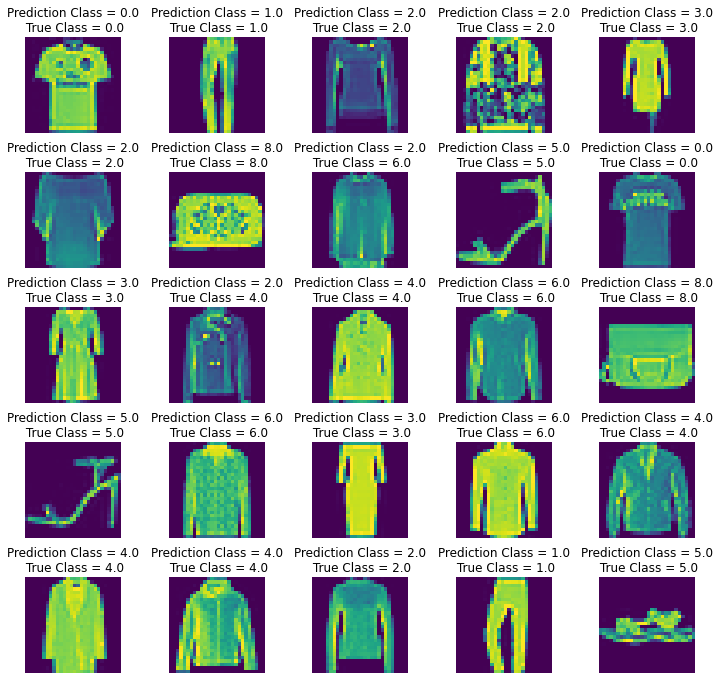

In [30]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


<AxesSubplot:>

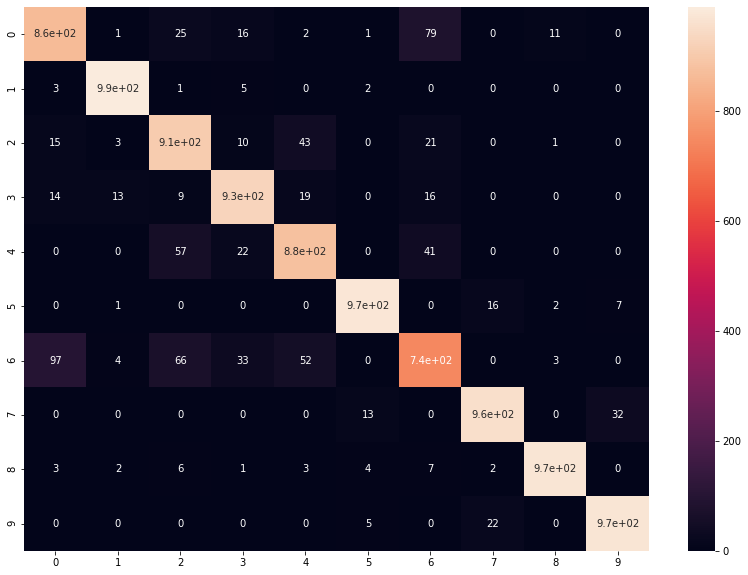

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [32]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.86      0.87      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.85      0.91      0.88      1000
     Class 3       0.91      0.93      0.92      1000
     Class 4       0.88      0.88      0.88      1000
     Class 5       0.97      0.97      0.97      1000
     Class 6       0.82      0.74      0.78      1000
     Class 7       0.96      0.95      0.96      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

